# Here we are trying to predict whether a person has heart disease

Approach considered:

1. EDA and pre-process it. This a classification problem so we might want to make sure that variables are normalized.
2. Check for Null values
3. Encode the categorical variables using One hot Vector encoding.
4. Drop the columns based on their contribution to model
5. Models used Logitic Regression, Knn Classifier, Linear SVC, Gaussian SVC(rbf), Random Forest Classifier.
   Used Grid Search CV to optimize the hyper parameter and find the best model for our dataset
6. Used Boosting and Ada Boosting (ensemble) method to improve score.


## List of available variables and assumptions

 -  age: continuous
 -  sex: categorical, 2 values {0: female, 1: male}
 -  cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
    This is descrition on Kaggle. However in actual dataset there are four categorical variables(from 0 to 3)
    Assuming {0: typical angina, 1: atypical angina, 2: non-angina, 3: asymptomatic angina}
 -  restbps (resting blood pressure on admission to hospital): continuous (mmHg)
 -  chol (serum cholesterol level): continuous (mg/dl)
 -   fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 -   restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 -  thalach (maximum heart rate achieved): continuous
 -  exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
 -  oldpeak (ST depression induced by exercise relative to rest): continuous
 -  slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
    This is descrition on Kaggle. However in actual dataset there are four categorical variables(from 0 to 2)
    Assuiming {0: upsloping, 1: flat, 2: downsloping}
 -  ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)    
 -  thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
    This is descrition on Kaggle. However in actual dataset there are four categorical variables(from 0 to 3)
 -  target (diagnosis of heart disease): 2 values {0: no, 1: yes}
    


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_recall_curve,recall_score,f1_score,auc,average_precision_score,roc_curve,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report,confusion_matrix


plt.style.use('ggplot')

In [2]:
# Import the data in Pandas dataframe
heart=pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.columns = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Heart_Disease']

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age              303 non-null int64
sex              303 non-null int64
cp               303 non-null int64
trestbps         303 non-null int64
chol             303 non-null int64
fbs              303 non-null int64
restecg          303 non-null int64
thalach          303 non-null int64
exang            303 non-null int64
oldpeak          303 non-null float64
slope            303 non-null int64
ca               303 non-null int64
thal             303 non-null int64
Heart_Disease    303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
heart.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
Heart_Disease      int64
dtype: object

In [7]:
heart.shape

(303, 14)

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA and Pre-processing of the dataset

# Plotting histogram for all the columns 

In [9]:
heart[["Heart_Disease","sex"]].groupby("sex").mean().sort_values(by='Heart_Disease',ascending=False)

,Heart_Disease
sex,
0,0.750000
1,0.449275


Text(0, 0.5, 'Number of Patients')

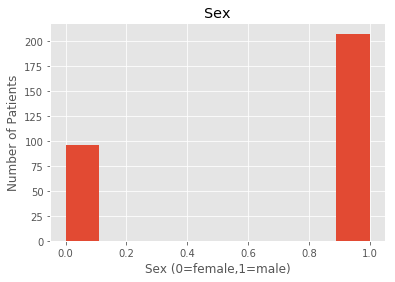

In [10]:
hist_plot = heart['sex'].hist(bins=9)
hist_plot.set_title('Sex')
hist_plot.set_xlabel("Sex (0=female,1=male)")
hist_plot.set_ylabel("Number of Patients")

The dataset clearly has more male records.

In [11]:
heart[["Heart_Disease","fbs"]].groupby("fbs").mean().sort_values(by='Heart_Disease',ascending=False)

,Heart_Disease
fbs,
0,0.550388
1,0.511111


Text(0, 0.5, 'Number of Patients')

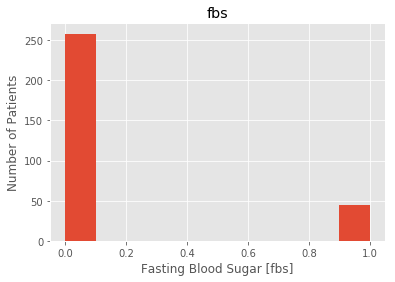

In [12]:
hist_plot = heart['fbs'].hist(bins=10)
hist_plot.set_title('fbs')
hist_plot.set_xlabel("Fasting Blood Sugar [fbs]")
hist_plot.set_ylabel("Number of Patients")

In [13]:
a=heart[["Heart_Disease","cp"]].groupby("cp").mean().sort_values(by='Heart_Disease', ascending=False)

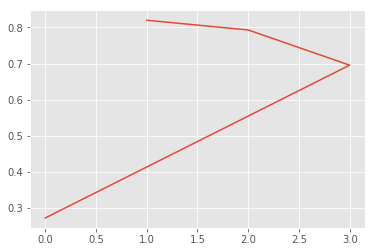

,Heart_Disease
cp,
1,0.820000
2,0.793103
3,0.695652
0,0.272727


In [14]:
plt.plot(a.index,a['Heart_Disease'])
plt.show()
a

Text(0, 0.5, 'Number of Patients')

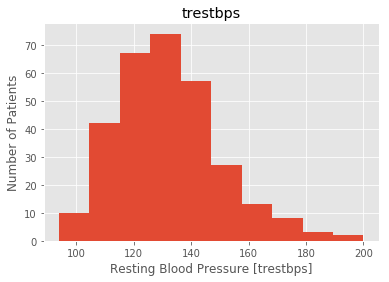

In [15]:
hist_plot = heart['trestbps'].hist(bins=10)
hist_plot.set_title('trestbps')
hist_plot.set_xlabel("Resting Blood Pressure [trestbps]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

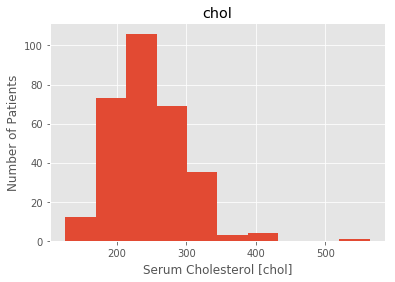

In [16]:
hist_plot = heart['chol'].hist(bins=10)
hist_plot.set_title('chol')
hist_plot.set_xlabel("Serum Cholesterol [chol]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

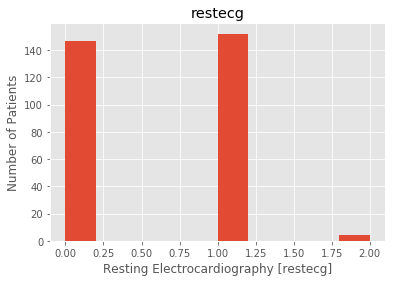

In [17]:
hist_plot = heart['restecg'].hist(bins=10)
hist_plot.set_title('restecg')
hist_plot.set_xlabel("Resting Electrocardiography [restecg]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

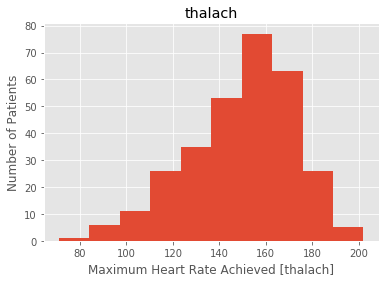

In [18]:
hist_plot = heart['thalach'].hist(bins=10)
hist_plot.set_title('thalach')
hist_plot.set_xlabel("Maximum Heart Rate Achieved [thalach]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

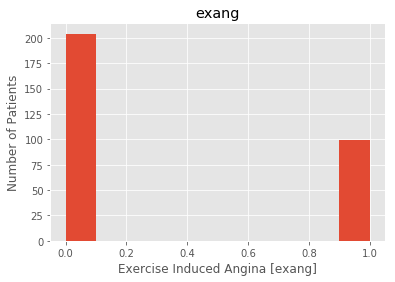

In [19]:



















hist_plot = heart['exang'].hist(bins=10)
hist_plot.set_title('exang')
hist_plot.set_xlabel("Exercise Induced Angina [exang]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

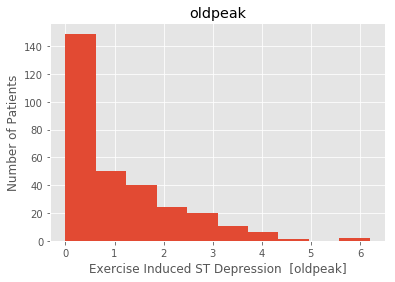

In [20]:
hist_plot = heart['oldpeak'].hist(bins=10)
hist_plot.set_title('oldpeak')
hist_plot.set_xlabel("Exercise Induced ST Depression  [oldpeak]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

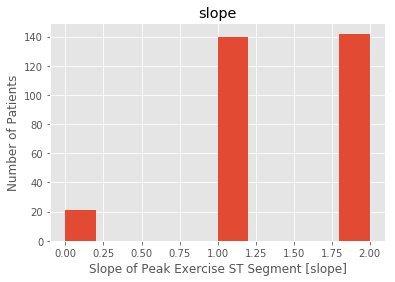

In [21]:
hist_plot = heart['slope'].hist(bins=10)
hist_plot.set_title('slope')
hist_plot.set_xlabel("Slope of Peak Exercise ST Segment [slope]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

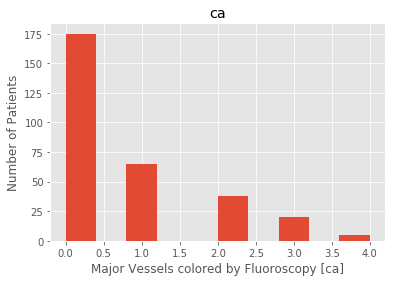

In [22]:
hist_plot = heart['ca'].hist(bins=10)
hist_plot.set_title('ca')
hist_plot.set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

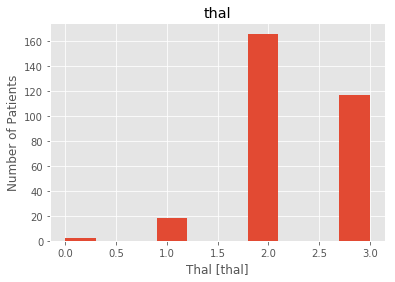

In [23]:
hist_plot = heart['thal'].hist(bins=10)
hist_plot.set_title('thal')
hist_plot.set_xlabel("Thal [thal]")
hist_plot.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

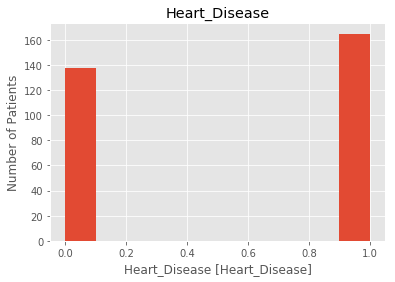

In [24]:
hist_plot = heart['Heart_Disease'].hist(bins=10)
hist_plot.set_title('Heart_Disease')
hist_plot.set_xlabel("Heart_Disease [Heart_Disease]")
hist_plot.set_ylabel("Number of Patients")

# There is not much imbalance in the sampling data. So we do not need to sample any further

In [25]:
pd.value_counts(heart['Heart_Disease']) 

1    165
0    138
Name: Heart_Disease, dtype: int64

# Drop the columns that are not contributing towards the dataset

In [26]:
pd.value_counts(heart['cp']) # Drop cp_3

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Dropping cp_3 as it is least contributing towards the dataset

In [27]:
pd.value_counts(heart['restecg']) # Drop restecg_2

1    152
0    147
2      4
Name: restecg, dtype: int64

In [28]:
pd.value_counts(heart['slope']) # Drop slope_0

2    142
1    140
0     21
Name: slope, dtype: int64

In [29]:
pd.value_counts(heart['thal']) # Drop 0 and 1

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

# One hot vector encoding for categorical values

In [30]:
heart.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
Heart_Disease      int64
dtype: object

In [31]:
heart['cp'] = pd.Categorical(heart['cp'])
dfDummies = pd.get_dummies(heart['cp'], prefix = 'cp')
heart = pd.concat([heart, dfDummies], axis=1)
heart = heart.drop(['cp'], axis=1)
heart = heart.drop(['cp_3'], axis=1)
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,cp_0,cp_1,cp_2
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0


In [32]:
heart.dtypes

age                int64
sex                int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
Heart_Disease      int64
cp_0               uint8
cp_1               uint8
cp_2               uint8
dtype: object

In [33]:
heart['restecg'] = pd.Categorical(heart['restecg'])
dfDummies = pd.get_dummies(heart['restecg'], prefix = 'restecg')
heart = pd.concat([heart, dfDummies], axis=1)
heart = heart.drop(['restecg'], axis=1)
heart = heart.drop(['restecg_2'], axis=1)
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,cp_0,cp_1,cp_2,restecg_0,restecg_1
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0,0,0,1,0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0,0,1,0,1
2,41,0,130,204,0,172,0,1.4,2,0,2,1,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,2,0,2,1,1,0,0,0,1


In [34]:
heart['slope'] = pd.Categorical(heart['slope'])
dfDummies = pd.get_dummies(heart['slope'], prefix = 'slope')
heart = pd.concat([heart, dfDummies], axis=1)
heart = heart.drop(['slope'], axis=1)
heart = heart.drop(['slope_0'], axis=1)
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,Heart_Disease,cp_0,cp_1,cp_2,restecg_0,restecg_1,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,1,1,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,0,2,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,2,1,0,1,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8,0,2,1,0,1,0,0,1,0,1
4,57,0,120,354,0,163,1,0.6,0,2,1,1,0,0,0,1,0,1


In [35]:
heart['thal'] = pd.Categorical(heart['thal'])
dfDummies = pd.get_dummies(heart['thal'], prefix = 'thal')
heart = pd.concat([heart, dfDummies], axis=1)
heart = heart.drop(['thal'], axis=1)
heart = heart.drop(['thal_0'], axis=1)
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,Heart_Disease,cp_0,cp_1,cp_2,restecg_0,restecg_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,1,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,1,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,1,0,1,0,1,0


# Checking for null values after pre-processing

In [36]:
heart.isnull().sum() 

age              0
sex              0
trestbps         0
chol             0
fbs              0
thalach          0
exang            0
oldpeak          0
ca               0
Heart_Disease    0
cp_0             0
cp_1             0
cp_2             0
restecg_0        0
restecg_1        0
slope_1          0
slope_2          0
thal_1           0
thal_2           0
thal_3           0
dtype: int64

There are no null values so we do not need to impute any data

In [37]:
heart.dtypes

age                int64
sex                int64
trestbps           int64
chol               int64
fbs                int64
thalach            int64
exang              int64
oldpeak          float64
ca                 int64
Heart_Disease      int64
cp_0               uint8
cp_1               uint8
cp_2               uint8
restecg_0          uint8
restecg_1          uint8
slope_1            uint8
slope_2            uint8
thal_1             uint8
thal_2             uint8
thal_3             uint8
dtype: object

# Plotting Age as per category to identify the distribution of data

In [38]:
pd.value_counts(heart['age'])

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [39]:
heart['age_categories'] = pd.cut(heart['age'], [0,30, 40, 50, 60, 70, 80], labels=['0-30', '30-40', '40-50','50-60','60-70','70-80'])

In [40]:
b = pd.value_counts(heart['age_categories']) 
b

50-60    129
40-50     76
60-70     73
30-40     18
70-80      6
0-30       1
Name: age_categories, dtype: int64

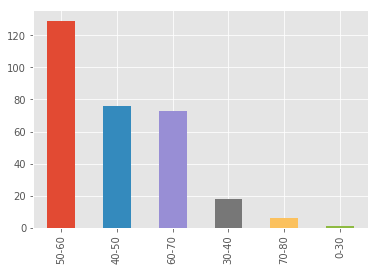

In [41]:
b.plot(kind='bar',x='age_categroies',y='Number of patients')

From the plot it is evident that patients between age of 50-60 has the highest heart disease records in our dataset.

Data type category


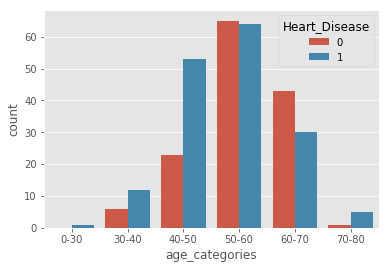

In [42]:
print("Data type",heart['age_categories'].dtype)
sns.countplot(x='age_categories',hue='Heart_Disease',data=heart)
plt.show()

From the above plot, we can say that people between age group of 40-50 have higher probability of getting a heart disease 
as compared to other age groups.

Data type int64


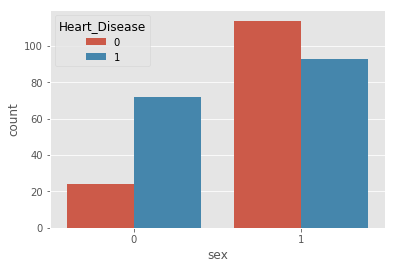

In [43]:
print("Data type",heart['sex'].dtype)
sns.countplot(x='sex',hue='Heart_Disease',data=heart)
plt.show()

From the above plot, we can say that females have higher probability of having heart disease as compared to males.

In [44]:
heart = heart.drop(['age_categories'], axis=1)

# Defining X as features and Y as target variable

In [45]:
X_c = pd.DataFrame(heart.loc[:,heart.columns!='Heart_Disease'])
y_c = pd.DataFrame(heart['Heart_Disease'])

# Standard Scaling Vs MinMax Scaling

___Applying Min Max scaler___

In [46]:
X_train_F,X_test_F,y_train_F,y_test_F = train_test_split(X_c,y_c,random_state = 0)
mmscaler = MinMaxScaler()
X_train_F = mmscaler.fit_transform(X_train_F)
X_test_F = mmscaler.transform(X_test_F)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
X_train_F.shape

(227, 19)

In [48]:
X_train_F.dtype.names

In [49]:
X_train_F = pd.DataFrame(X_train_F,columns=['age', 'sex','trestbps','chol','fbs','thalach','exang','oldpeak','ca','cp_0','cp_1','cp_2','restecg_0','restecg_1','slope_1','slope_2','thal_1','thal_2','thal_3'])

C:\Users\anike\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


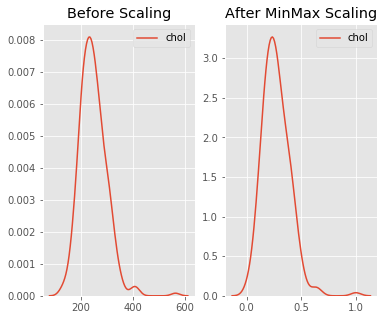

In [50]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(heart['chol'],ax=ax1)
ax2.set_title("After MinMax Scaling")
sns.kdeplot(X_train_F['chol'],ax=ax2)

In MinMax Scaling the data is scaled to same scale(Normalize betweeen 0,1) as seen in the plot. However they are not centered to mean = 0.(Standardized!!)

___Applying standard scalar___

In [51]:
X_train_F1,X_test_F1,y_train_F1,y_test_F1 = train_test_split(X_c,y_c,random_state = 0)
stdscaler = StandardScaler()
X_train_F1 = stdscaler.fit_transform(X_train_F1)
X_test_F1 = stdscaler.transform(X_test_F1)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [52]:
X_train_F1 = pd.DataFrame(X_train_F1,columns=['age', 'sex','trestbps','chol','fbs','thalach','exang','oldpeak','ca','cp_0','cp_1','cp_2','restecg_0','restecg_1','slope_1','slope_2','thal_1','thal_2','thal_3'])

C:\Users\anike\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


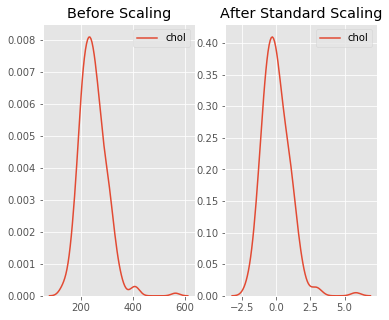

In [53]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(heart['chol'],ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_F1['chol'],ax=ax2)

Standard Scaling removes the mean and scales the data to unit variance as we can see in the plot. However, as outliers of each feature have different magnitudes these variables are not scaled at the same scale. Standard Scalar is not guarranting balanced feature scaling.

In Classification problems it is important to have data normalized that is having the same scale, rather than standardized without having equal scale So, we will be using MinMax scaling rather than Standard Scaling.

In [54]:
# MinMax Scaling
X_train_C,X_test_C,y_train_C,y_test_C = train_test_split(X_c,y_c,random_state = 0,test_size=.70)
stdscaler = MinMaxScaler()
X_train_C = stdscaler.fit_transform(X_train_C)
X_test_C = stdscaler.transform(X_test_C)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Logistic regression using recall as scoring parameter

Here we are using recall parameter since it answers the question what proportion of actual positives was correctly indentified. 
In this case we want to focus on correctly indentifying the poeple having heart disease, hence we will be using recall as scoring
parameter for all the classification models

In [55]:
from sklearn.linear_model import LogisticRegression
logit_param = {'penalty':['l1','l2'],'C':[0.01, 0.1, 1, 10, 100, 1000]}

logit = LogisticRegression(random_state = 0)
gridlogit1 = GridSearchCV(estimator = logit,param_grid = logit_param,n_jobs=-1,cv=10,scoring='recall')
gridlogit1.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [56]:
gridlogit1.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [57]:
gridlogit1.score(X_test_C,y_test_C)

0.7521367521367521

In [58]:
gridlogit1_train_prediction = gridlogit1.predict(X_train_C)
gridlogit1_test_prediction = gridlogit1.predict(X_test_C)

In [59]:
print('Train Recall_score: %.2f'%recall_score(gridlogit1_train_prediction, y_train_C))
print('Test Recall_score: %.2f '%recall_score(gridlogit1_test_prediction, y_test_C))

Train Recall_score: 0.81
Test Recall_score: 0.77 


In [60]:
print("CLassification_metrics :")
print(classification_report(y_test_C,gridlogit1_test_prediction))

CLassification_metrics :
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        96
           1       0.77      0.75      0.76       117

   micro avg       0.74      0.74      0.74       213
   macro avg       0.74      0.74      0.74       213
weighted avg       0.74      0.74      0.74       213



In [61]:
Class_report_table = [['Logistic Regression',gridlogit1.best_params_ , gridlogit1.score(X_train_C, y_train_C), gridlogit1.score(X_test_C, y_test_C), recall_score(gridlogit1_train_prediction, y_train_C), recall_score(gridlogit1_test_prediction, y_test_C) ]]

# KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knnC = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='recall')
grid_knnC.fit(X_train_C, y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [63]:
grid_knnC.best_params_

{'n_neighbors': 5}

In [64]:
grid_knnC.score(X_train_C, y_train_C)

0.9583333333333334

In [65]:
grid_knnC.score(X_test_C,y_test_C)

0.8205128205128205

In [66]:
gridknnC_train_prediction = grid_knnC.predict(X_train_C)
gridknnC_test_prediction = grid_knnC.predict(X_test_C)

In [67]:
print('Train Recall score: %.2f'%recall_score(gridknnC_train_prediction, y_train_C))
print('Test Recall score: %.2f '%recall_score(gridknnC_test_prediction, y_test_C))

Train Recall score: 0.82
Test Recall score: 0.82 


In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_C, gridknnC_test_prediction)

In [69]:
cm

array([[75, 21],
       [21, 96]], dtype=int64)

In [70]:
numer = cm[0][0] + cm[1][1]
denom = numer + cm[0][1] + cm[1][0]
accuracy = (numer / denom) * 100

In [71]:
accuracy

80.28169014084507

In [72]:
Class_report_table =Class_report_table + [['Knn Classifier',grid_knnC.best_params_, grid_knnC.score(X_train_C, y_train_C), grid_knnC.score(X_test_C, y_test_C), recall_score(gridknnC_train_prediction, y_train_C), recall_score(gridknnC_test_prediction, y_test_C) ]]

# Linear SVC

In [73]:
from sklearn.svm import SVC,LinearSVC
lsvc_param = {'C':[0.1, 1, 10, 100]}
linearsvc = SVC(kernel = 'linear',random_state=0)
gridlinearsvc = GridSearchCV(estimator = linearsvc,param_grid = lsvc_param,n_jobs=-1,cv=10,scoring='recall')
gridlinearsvc.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [74]:
gridlinearsvc.score(X_train_C,y_train_C)

0.9583333333333334

In [75]:
gridlinearsvc.score(X_test_C,y_test_C)

0.8547008547008547

In [76]:
gridlinearsvc.best_params_

{'C': 100}

In [77]:
gridlinearsvc_train_prediction = gridlinearsvc.predict(X_train_C)
gridlinearsvc_test_prediction = gridlinearsvc.predict(X_test_C)

In [78]:
print('Train Recall score: %.2f'%recall_score(gridlinearsvc_train_prediction, y_train_C))
print('Test Recall score: %.2f '%recall_score(gridlinearsvc_test_prediction, y_test_C))

Train Recall score: 0.96
Test Recall score: 0.82 


In [79]:
Class_report_table =Class_report_table + [['LinearSVC ',gridlinearsvc.best_params_, gridlinearsvc.score(X_train_C,y_train_C), gridlinearsvc.score(X_test_C,y_test_C), recall_score(gridlinearsvc_train_prediction, y_train_C), recall_score(gridlinearsvc_test_prediction, y_test_C) ]]

# Gaussian SVC

In [80]:
svc_param = {'C':[0.1, 1, 10, 100,1000],'gamma':[0.01,0.1,1,10,100]}
svc = SVC(kernel = 'rbf')
gridsvc = GridSearchCV(estimator = svc,param_grid = svc_param,n_jobs=-1,cv=10,scoring='recall')
gridsvc.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [81]:
gridsvc.best_params_

{'C': 0.1, 'gamma': 0.01}

In [82]:
gridsvc_train_prediction = gridsvc.predict(X_train_C)
gridsvc_test_prediction = gridsvc.predict(X_test_C)

In [83]:
print('Train Recall score: %.2f'%recall_score(gridsvc_train_prediction, y_train_C))
print('Test Recall score: %.2f '%recall_score(gridsvc_test_prediction, y_test_C))

Train Recall score: 0.53
Test Recall score: 0.55 


In [84]:
Class_report_table =Class_report_table + [['GaussianSVC ',gridsvc.best_params_, gridsvc.score(X_train_C, y_train_C), gridsvc.score(X_test_C, y_test_C), recall_score(gridsvc_train_prediction, y_train_C), recall_score(gridsvc_test_prediction, y_test_C) ]]

# Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_param = {'bootstrap':[True],'n_estimators' : [500,1000],'min_samples_leaf': [10,20,50]}
rf = RandomForestClassifier(random_state = 0)
rfgrid = GridSearchCV(estimator=rf,param_grid=rf_param,n_jobs=-1,cv = 10,scoring='recall')
rfgrid.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'n_estimators': [500, 1000], 'min_samples_leaf': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [86]:
rfgrid.best_params_

{'bootstrap': True, 'min_samples_leaf': 50, 'n_estimators': 500}

In [87]:
gridrf_train_prediction = gridsvc.predict(X_train_C)
gridrf_test_prediction = gridsvc.predict(X_test_C)

In [88]:
print('Train Recall score: %.2f'%recall_score(gridrf_train_prediction, y_train_C))
print('Test Recall score: %.2f '%recall_score(gridrf_test_prediction, y_test_C))

Train Recall score: 0.53
Test Recall score: 0.55 


In [89]:
Class_report_table =Class_report_table + [['Random_Forest ',rfgrid.best_params_, rfgrid.score(X_train_C, y_train_C), rfgrid.score(X_test_C, y_test_C), recall_score(gridrf_train_prediction, y_train_C), recall_score(gridrf_test_prediction, y_test_C)]]

In [90]:
Class_report_table = pd.DataFrame(Class_report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train Recall score', 'Test Recall score'])

In [91]:
Class_report_table

,Model name,Model parameter,Train accuracy,Test accuracy,Train Recall score,Test Recall score
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.875000,0.752137,0.807692,0.771930
1,Knn Classifier,{'n_neighbors': 5},0.958333,0.820513,0.821429,0.820513
2,LinearSVC,{'C': 100},0.958333,0.854701,0.958333,0.819672
3,GaussianSVC,"{'C': 0.1, 'gamma': 0.01}",1.000000,1.000000,0.533333,0.549296
4,Random_Forest,"{'bootstrap': True, 'min_samples_leaf': 50, 'n...",1.000000,1.000000,0.533333,0.549296


_We can see that Knn Classifier is giving us the best Recall score for training and testing data!_ 

_On comparitive analysis, its evident that GaussianSVC, Random Forest are performing poorly._ 
_Linear SVC although gives a high training score, it has low testing score which indicates overfitting. Knn Classifier seems to_
_be best model as it gives good training and testing score which almost the same._

_So applying Knn classifier with 5 neighbours on our dataset after considering the best parameters on application of_ _GridSearchCV_

# KNN Classifier on Final Data

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
knn.fit(X_train_F,y_train_F)

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
X_train_F.shape

(227, 19)

In [94]:
X_test_F.shape

(76, 19)

In [95]:
print(knn.score(X_train_F,y_train_F))
print(knn.score(X_test_F,y_test_F))

0.8502202643171806
0.8421052631578947


In [96]:
finalknn_train_prediction = knn.predict(X_train_F)
finalknn_test_prediction = knn.predict(X_test_F)

In [97]:
print('Final Train Recall score: %.2f'%recall_score(finalknn_train_prediction, y_train_F))
print('Final Test Recall score: %.2f '%recall_score(finalknn_test_prediction, y_test_F))

Final Train Recall score: 0.86
Final Test Recall score: 0.86 


In [98]:
print("Confusion Metrics is :")
print(confusion_matrix(finalknn_test_prediction,y_test_F))

Confusion Metrics is :
[[27  6]
 [ 6 37]]


In [99]:
print("CLassification_metrics :")
print(classification_report(y_test_F,finalknn_test_prediction))

CLassification_metrics :
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.86      0.86      0.86        43

   micro avg       0.84      0.84      0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



# Plotting Precision Recall Curve

Text(0.5, 1.0, 'Final Test Recall score: 0.86 ')

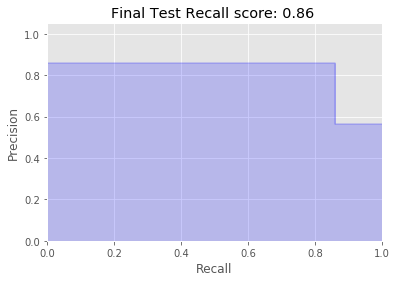

In [100]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_F,finalknn_test_prediction)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Final Test Recall score: %.2f '%recall_score(finalknn_test_prediction, y_test_F))

C:\Users\anike\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


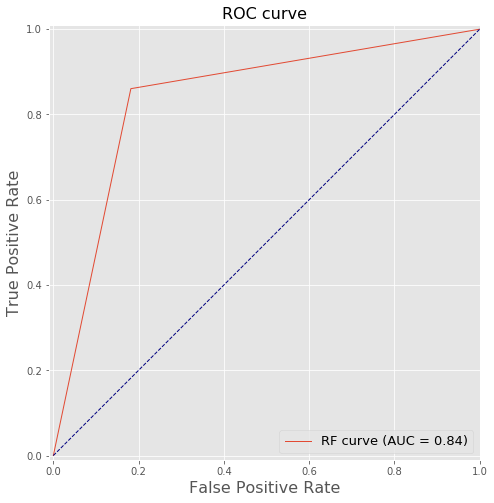

In [101]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_F, finalknn_test_prediction)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

# Ada Boosting

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_dtclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_dtclf.fit(X_train_C, y_train_C.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [103]:
print('Train score: {:.2f}'.format(ada_dtclf.score(X_train_C, y_train_C)))
print('Test score: {:.2f}'.format(ada_dtclf.score(X_test_F,y_test_F)))

Train score: 1.00
Test score: 0.71


In [104]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

ada_logclf = AdaBoostClassifier(logistic, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_logclf.fit(X_train_C, y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [105]:
print('Train score: {:.2f}'.format(ada_logclf.score(X_train_C, y_train_C)))
print('Test score: {:.2f}'.format(ada_logclf.score(X_test_F,y_test_F)))

Train score: 0.84
Test score: 0.80


# Boosting

In [106]:
from  sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbcl.fit(X_train_C, y_train_C.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [108]:
print('Train score: {:.2f}'.format(gbcl.score(X_train_C, y_train_C)))
print('Test score: {:.2f}'.format(gbcl.score(X_test_F,y_test_F)))

Train score: 0.99
Test score: 0.76
